# 📚 Tutorial: Stochastic Processes and Numerical Simulation in Python

This tutorial covers essential concepts and practical examples related to stochastic processes and numerical simulations using Python. Topics include uncertainty in stochastic processes, Brownian motion, financial options pricing using the binomial model, and numerical solutions of stochastic differential equations (SDEs) via the Euler-Maruyama method.

---

## 🌟 **Uncertainty and Stochastic Processes**

Stochastic processes involve random variables that evolve over time. These processes are fundamental in modeling systems where uncertainty plays a crucial role, such as financial markets, physics, and biology.

A simple example is the **Wiener process** (Brownian motion), defined as:

$$
W(t) = \sum_{i=1}^{n} \Delta W_i, \quad \Delta W_i \sim \mathcal{N}(0, \Delta t)
$$

### 🐍 **Example: Simulating a Stochastic Process**

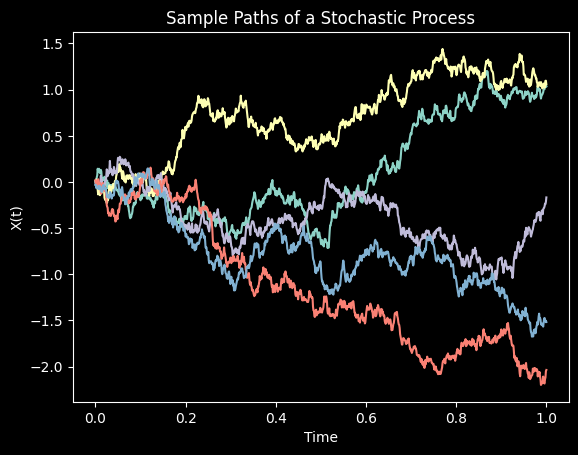

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_stochastic_process(T, N, M):
    dt = T / N
    dX = np.sqrt(dt) * np.random.randn(M, N)
    X = np.cumsum(dX, axis=1)
    t = np.linspace(0, T, N)
    plt.plot(t, X.T)
    plt.title("Sample Paths of a Stochastic Process")
    plt.xlabel("Time")
    plt.ylabel("X(t)")
    plt.show()

simulate_stochastic_process(T=1, N=1000, M=5)

---

## 🌊 **Lyapunov Exponent and Brownian Motion**

The **Lyapunov exponent** measures the rate of separation of infinitesimally close trajectories. For stochastic systems, it helps in understanding system stability under random perturbations.

**Brownian motion** is modeled as:

$$
dX_t = \mu \, dt + \sigma \, dW_t
$$

### 🐍 **Example: Brownian Motion Simulation**

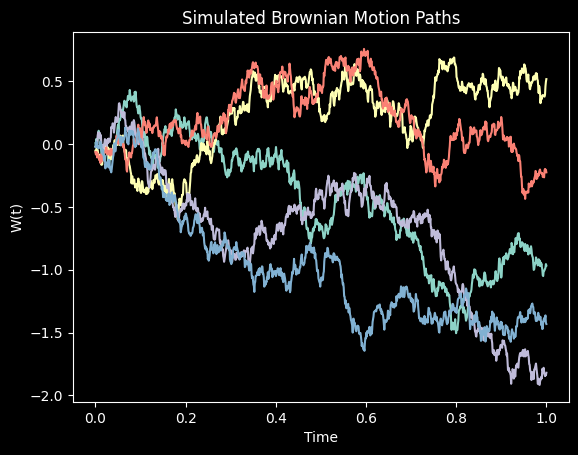

In [2]:
def simulate_brownian_motion(T, N, M):
    dt = T / N
    dW = np.sqrt(dt) * np.random.randn(M, N)
    W = np.cumsum(dW, axis=1)
    t = np.linspace(0, T, N)
    plt.plot(t, W.T)
    plt.title("Simulated Brownian Motion Paths")
    plt.xlabel("Time")
    plt.ylabel("W(t)")
    plt.show()

simulate_brownian_motion(T=1, N=1000, M=5)

---

## 💰 **Financial Options and the Binomial Model**

The **binomial model** approximates the price of financial options. Over each time step, the underlying asset price can move up or down by a certain factor.

The recursive formula for a European call option is:

$$
C_0 = e^{-rT} \mathbb{E}[C_T]
$$

### 🐍 **Example: Binomial Model for Option Pricing**

In [3]:
def binomial_option_pricing(S0, K, T, r, sigma, N, option_type='call'):
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)
    S = np.zeros((N + 1, N + 1))
    for i in range(N + 1):
        for j in range(i + 1):
            S[j, i] = S0 * (u ** j) * (d ** (i - j))
    if option_type == 'call':
        C = np.maximum(0, S[:, N] - K)
    else:
        C = np.maximum(0, K - S[:, N])
    for i in range(N - 1, -1, -1):
        for j in range(i + 1):
            C[j] = np.exp(-r * dt) * (p * C[j + 1] + (1 - p) * C[j])
    return C[0]

price = binomial_option_pricing(S0=100, K=100, T=1, r=0.05, sigma=0.2, N=100)
print(f"Option Price: {price:.2f}")

Option Price: 10.43


---

## 🧮 **ODEs and Euler + Maruyama Method**

For stochastic differential equations:

$$
dX_t = \mu(X_t, t) \, dt + \sigma(X_t, t) \, dW_t
$$

The **Euler-Maruyama method** approximates solutions by:

$$
X_{t+\Delta t} = X_t + \mu(X_t, t)\Delta t + \sigma(X_t, t)\sqrt{\Delta t}Z
$$

where $ Z \sim \mathcal{N}(0,1) $.

### 🐍 **Example: Euler-Maruyama Method for SDE**

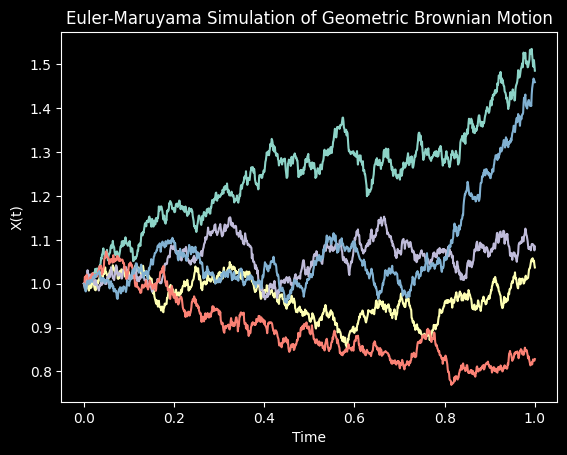

In [4]:
def euler_maruyama(mu, sigma, X0, T, N, M):
    dt = T / N
    X = np.zeros((M, N))
    X[:, 0] = X0
    for i in range(1, N):
        dW = np.sqrt(dt) * np.random.randn(M)
        X[:, i] = X[:, i-1] + mu * X[:, i-1] * dt + sigma * X[:, i-1] * dW
    t = np.linspace(0, T, N)
    plt.plot(t, X.T)
    plt.title("Euler-Maruyama Simulation of Geometric Brownian Motion")
    plt.xlabel("Time")
    plt.ylabel("X(t)")
    plt.show()

euler_maruyama(mu=0.1, sigma=0.2, X0=1, T=1, N=1000, M=5)

---

## 🎲 **Simulation of Sample Paths and Convergence**

Simulating sample paths involves generating multiple realizations of a stochastic process to estimate statistical properties. **Convergence** is evaluated by refining the time discretization and observing if the numerical solution stabilizes.

### 🐍 **Example: Convergence of Euler-Maruyama Method**

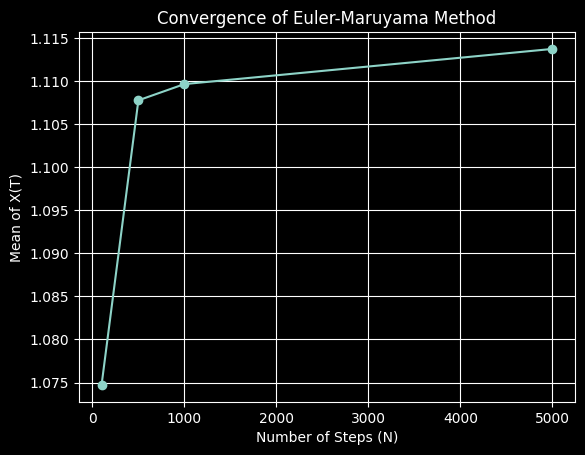

In [5]:
def convergence_analysis(mu, sigma, X0, T, N_values, M):
    means = []
    for N in N_values:
        dt = T / N
        X = np.zeros((M, N))
        X[:, 0] = X0
        for i in range(1, N):
            dW = np.sqrt(dt) * np.random.randn(M)
            X[:, i] = X[:, i-1] + mu * X[:, i-1] * dt + sigma * X[:, i-1] * dW
        means.append(np.mean(X[:, -1]))

    plt.plot(N_values, means, marker='o')
    plt.title("Convergence of Euler-Maruyama Method")
    plt.xlabel("Number of Steps (N)")
    plt.ylabel("Mean of X(T)")
    plt.grid(True)
    plt.show()

convergence_analysis(mu=0.1, sigma=0.2, X0=1, T=1, N_values=[100, 500, 1000, 5000], M=100)

---

## 🎯 **Conclusion**

This tutorial introduced key stochastic simulation concepts using Python, including:

- Brownian motion generation
- Option pricing via the binomial model
- Solving SDEs using the Euler-Maruyama method
- Analyzing convergence of stochastic simulations

These methods are widely used in financial modeling, physics, and engineering for understanding systems under uncertainty.